In [84]:

import pandas as pd
import numpy as np
from sklearn.calibration import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('../data/processed/coches_baratos_procc.csv')
df

,Brand_c,Price,Kilometers,Year,Seats,Doors,Brand_Model_code,Country_c,Gearbox_c,Fuel_c,Seller_c,Type_c,Drivetrain_c,Upholstery_c,Color_c,Body_Type_c
0,0,5100.0,225282.0,2013,7.0,5.0,0.205,1,0,1,0,0,1.0,1,0,5
1,0,1995.0,162076.0,2010,4.0,5.0,0.181,2,1,0,0,0,0.0,0,1,2
2,0,2995.0,53914.0,2006,4.0,5.0,0.181,2,1,0,0,0,0.0,0,0,2
3,0,1450.0,238642.0,2006,5.0,5.0,0.030,2,1,0,0,0,0.0,0,0,2
4,0,8900.0,199000.0,2017,5.0,5.0,0.354,1,1,4,0,0,0.0,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11403,30,54980.0,29652.0,2016,2.0,2.0,30.425,0,1,0,0,0,1.0,1,0,4
11404,30,33600.0,91785.0,1980,2.0,2.0,30.095,0,0,0,1,0,2.0,1,0,4
11405,30,15000.0,81000.0,1971,2.0,2.0,30.095,1,1,0,1,0,1.0,1,13,4
11406,30,21800.0,85000.0,1971,2.0,2.0,30.095,4,1,0,1,0,2.0,3,10,6


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11408 entries, 0 to 11407
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand_c           11408 non-null  int64  
 1   Price             11408 non-null  float64
 2   Kilometers        11408 non-null  float64
 3   Year              11408 non-null  int64  
 4   Seats             11408 non-null  float64
 5   Doors             11408 non-null  float64
 6   Brand_Model_code  11408 non-null  float64
 7   Country_c         11408 non-null  int64  
 8   Gearbox_c         11408 non-null  int64  
 9   Fuel_c            11408 non-null  int64  
 10  Seller_c          11408 non-null  int64  
 11  Type_c            11408 non-null  int64  
 12  Drivetrain_c      11408 non-null  float64
 13  Upholstery_c      11408 non-null  int64  
 14  Color_c           11408 non-null  int64  
 15  Body_Type_c       11408 non-null  int64  
dtypes: float64(6), int64(10)
memory usage: 1

<Axes: ylabel='Price'>

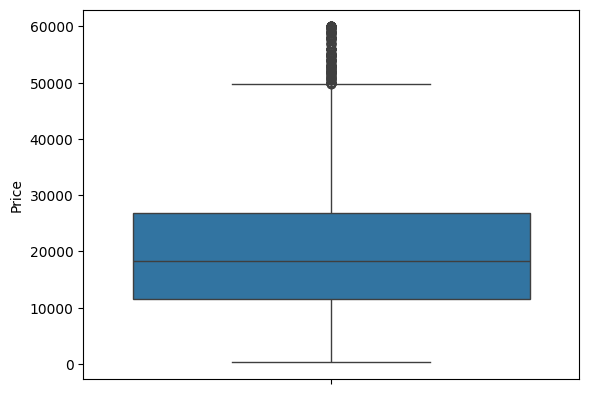

In [30]:
sns.boxplot(df['Price'])

In [ ]:
#Ya viende del fichero 
# df = df[df['Price']< 50000]

In [33]:
X = df.drop(columns = ['Price'])
y = df['Price']

In [34]:
X

,Brand_c,Kilometers,Year,Seats,Doors,Brand_Model_code,Country_c,Gearbox_c,Fuel_c,Seller_c,Type_c,Drivetrain_c,Upholstery_c,Color_c,Body_Type_c
0,0,225282.0,2013,7.0,5.0,0.205,1,0,1,0,0,1.0,1,0,5
1,0,162076.0,2010,4.0,5.0,0.181,2,1,0,0,0,0.0,0,1,2
2,0,53914.0,2006,4.0,5.0,0.181,2,1,0,0,0,0.0,0,0,2
3,0,238642.0,2006,5.0,5.0,0.030,2,1,0,0,0,0.0,0,0,2
4,0,199000.0,2017,5.0,5.0,0.354,1,1,4,0,0,0.0,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11401,30,100000.0,1987,2.0,2.0,30.001,3,0,0,1,0,2.0,1,5,4
11404,30,91785.0,1980,2.0,2.0,30.095,0,0,0,1,0,2.0,1,0,4
11405,30,81000.0,1971,2.0,2.0,30.095,1,1,0,1,0,1.0,1,13,4
11406,30,85000.0,1971,2.0,2.0,30.095,4,1,0,1,0,2.0,3,10,6


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [36]:
print("Total features shape:", X.shape)
print("Train features shape:", X_train.shape)
print("Train target shape:", y_train.shape)
print("Test features shape:", X_test.shape)
print("Test target shape:", y_test.shape)

Total features shape: (11200, 15)
Train features shape: (7840, 15)
Train target shape: (7840,)
Test features shape: (3360, 15)
Test target shape: (3360,)


In [46]:
lm = LinearRegression()
lm.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [47]:
coeff_df = pd.DataFrame(lm.coef_,
                        X.columns,
                        columns=['Coefficient'])
coeff_df

,Coefficient
Brand_c,-10064.508607
Kilometers,-0.047053
Year,429.228056
Seats,247.093025
Doors,-938.866944
Brand_Model_code,10562.607825
Country_c,269.008991
Gearbox_c,-3799.701876
Fuel_c,232.253621
Seller_c,-133.156732


In [48]:
predictions = lm.predict(X_test)
predictions

array([ 6909.65643951, 22306.50722491, 26629.10432989, ...,
       28509.97780908,  5773.99073062, 27421.65441066], shape=(3360,))

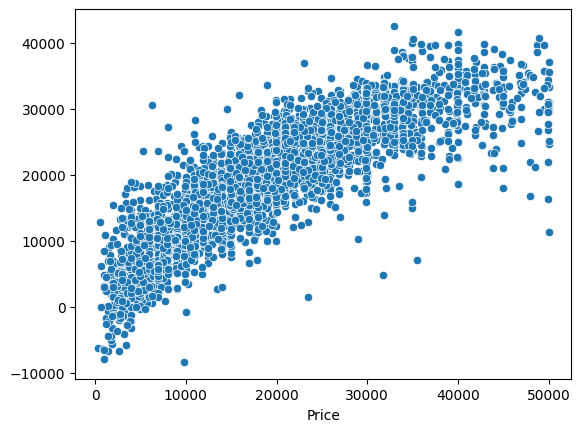

In [49]:
sns.scatterplot(x = y_test, y = predictions);

In [51]:
print('EVALUACIÓN DE LAS METRICAS')
print('=' *50)
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', metrics.root_mean_squared_error(y_test, predictions))
print('R2:' , metrics.r2_score(y_test, predictions))

EVALUACIÓN DE LAS METRICAS
MAE: 4251.298540506184
MSE: 33579287.85149071
RMSE: 5794.763830518955
R2: 0.7033625581869307


In [42]:
residuals = y_test - predictions

# Identificar outliers
std_residuals = np.std(residuals)
outlier_threshold = 3 * std_residuals
outlier_indices = np.where(np.abs(residuals) > outlier_threshold)[0]

print("ANÁLISIS DE OUTLIERS")
print(f"Desviación estándar de residuos: {std_residuals:.4f}")
print(f"Umbral de outlier: ±{outlier_threshold:.4f}")
print(f"Número de outliers identificados: {len(outlier_indices)}")
print(f"Índices de outliers: {outlier_indices}")


ANÁLISIS DE OUTLIERS
Desviación estándar de residuos: 5794.6882
Umbral de outlier: ±17384.0645
Número de outliers identificados: 48
Índices de outliers: [  12   61   92  220  257  387  409  464  484  618  636  755  766  839
  875  903 1092 1162 1326 1328 1329 1334 1346 1434 1447 1471 1568 1591
 1601 1733 1911 1954 2230 2378 2385 2466 2486 2516 2542 2692 2787 2794
 2918 3032 3048 3185 3228 3240]


In [ ]:
# !!!!! No estoy segura

# Eliminarlos del conjunto de entrenamiento
X_train_clean = X_train.copy()
y_train_clean = y_train.copy()

# Identificar outliers en entrenamiento también
train_pred = lm.predict(X_train)
train_residuals = y_train - train_pred
train_outliers = np.where(np.abs(train_residuals) > outlier_threshold)[0]

if len(train_outliers) > 0:
    print(f"\n Eliminando {len(train_outliers)} outliers del entrenamiento")
    X_train_clean = np.delete(X_train, train_outliers, axis=0)
    y_train_clean = np.delete(y_train, train_outliers, axis=0)
    
    # Reentrenar modelo
    model_clean = LinearRegression()
    model_clean.fit(X_train_clean, y_train_clean)
    
    # Nueva evaluación
    y_pred_clean = model_clean.predict(X_test)
    mse_clean = metrics.mean_squared_error(y_test, y_pred_clean)
    mae_clean = metrics.mean_absolute_error(y_test, y_pred_clean)
    print(f"Nuevo MSE: {mse_clean:.4f}, MAE: {mae_clean:.4f}")


 Eliminando 113 outliers del entrenamiento
Nuevo MSE: 45578905.2086, MAE: 4669.6698


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


<Axes: xlabel='Price', ylabel='Count'>

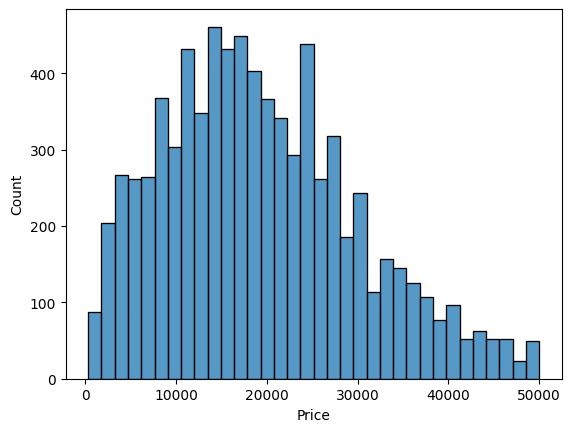

In [54]:
sns.histplot( y_train, )

<Axes: xlabel='Price', ylabel='Count'>

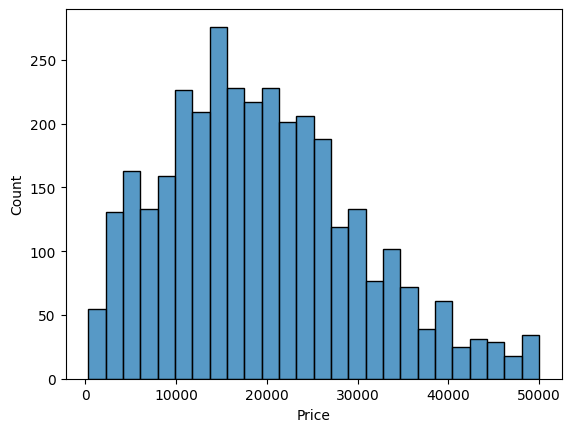

In [55]:
sns.histplot( y_test )

In [65]:
# Create bins for stratification (e.g., 10 quantile bins)
'''df['target_bins'] = pd.qcut(df['Price'], q=10, labels=False, duplicates='drop')

# Stratified split using binned target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42,
    stratify=df['target_bins']
)
'''
# Drop the bin column if you don't need it
#X_train = X_train.drop('target_bins', axis=1)
#X_test = X_test.drop('target_bins', axis=1)

"df['target_bins'] = pd.qcut(df['Price'], q=10, labels=False, duplicates='drop')\n\n# Stratified split using binned target\nX_train, X_test, y_train, y_test = train_test_split(\n    X, y, \n    test_size=0.2, \n    random_state=42,\n    stratify=df['target_bins']\n)\n"

<Axes: xlabel='Price', ylabel='Count'>

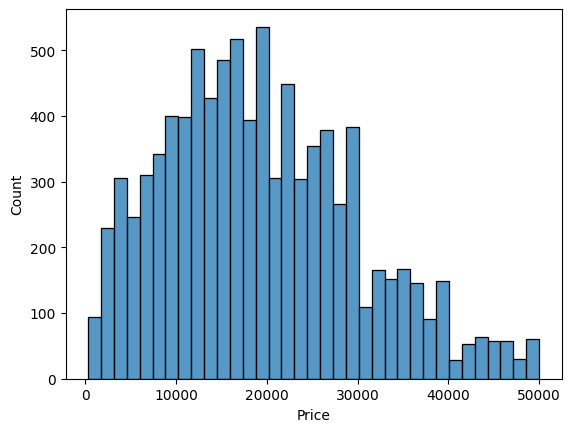

In [60]:
sns.histplot( y_train, )

<Axes: xlabel='Price', ylabel='Count'>

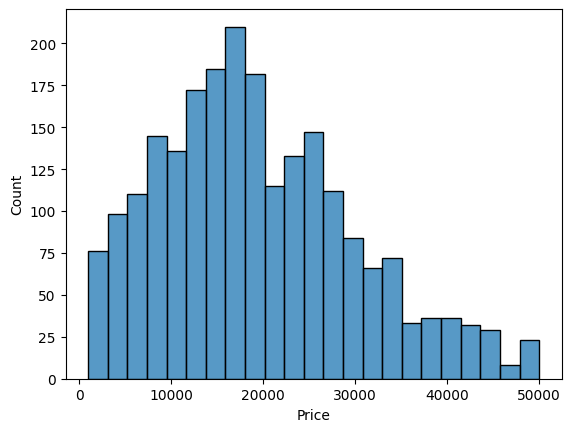

In [61]:
sns.histplot( y_test,)

# probar Ridge, Lasso, Elastic Net

In [62]:
# Escalar features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Ridge Regression (L2)
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)

# Lasso Regression (L1)
lasso = Lasso(alpha=0.01, max_iter=10000)
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)

#. ElasticNet (combinación L1 + L2)
elastic = ElasticNet(alpha=0.01, l1_ratio=0.5, max_iter=10000)
elastic.fit(X_train_scaled, y_train)
y_pred_elastic = elastic.predict(X_test_scaled)

print("COMPARACIÓN CON REGULARIZACIÓN:")
for name, pred in [('Ridge', y_pred_ridge), 
                   ('Lasso', y_pred_lasso), 
                   ('ElasticNet', y_pred_elastic)]:
    mae = metrics.mean_absolute_error(y_test, pred)
    mse = metrics.mean_squared_error(y_test, pred)
    r2 = metrics.r2_score(y_test, pred)
    print(f"{name:12} - MSE: {mse:.4f}, R²: {r2:.4f}, MAE: {mae:.4f}")

COMPARACIÓN CON REGULARIZACIÓN:
Ridge        - MSE: 37437409.4904, R²: 0.6719, MAE: 4316.7131
Lasso        - MSE: 36858259.2279, R²: 0.6770, MAE: 4302.9963
ElasticNet   - MSE: 41590477.6821, R²: 0.6356, MAE: 4574.4674


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.314e+11, tolerance: 1.017e+08
  model = cd_fast.enet_coordinate_descent(


In [63]:
# 1. Random Forest
rf = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    random_state=42
)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# 2. Gradient Boosting
gb = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

# 3. Decision Tree (puede capturar no linealidades)
tree = DecisionTreeRegressor(
    max_depth=10,
    min_samples_split=10,
    random_state=42
)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

print("COMPARACIÓN CON MODELOS DE ENSEMBLE:")
ensemble_results = {
    'Random Forest': y_pred_rf,
    'Gradient Boosting': y_pred_gb,
    'Decision Tree': y_pred_tree
}

for name, pred in ensemble_results.items():
    mse = metrics.mean_squared_error(y_test, pred)
    r2 = metrics.r2_score(y_test, pred)
    mae = metrics.mean_absolute_error(y_test, pred)
    
    print(f"{name:20} - MSE: {mse:.4f}, R²: {r2:.4f}, MAE: {mae:.4f}")

COMPARACIÓN CON MODELOS DE ENSEMBLE:
Random Forest        - MSE: 18871332.1126, R²: 0.8346, MAE: 3056.9113
Gradient Boosting    - MSE: 15306937.1653, R²: 0.8659, MAE: 2725.5902
Decision Tree        - MSE: 27221503.9312, R²: 0.7615, MAE: 3555.2778


In [82]:
# Configuración mejorada
gb_better = GradientBoostingRegressor(
    n_estimators=300,           # ↑ Más árboles
    learning_rate=0.08,         # ↓ Tasa de aprendizaje más baja
    max_depth=6,                # ↑ Profundidad moderada
    min_samples_split=10,       # Evitar sobreajuste
    min_samples_leaf=5,         # Regularización
    subsample=0.8,              # Stochastic Gradient Boosting
    max_features='sqrt',        # Usar sqrt(n_features) en cada split
    random_state=42,
    n_iter_no_change=10,        # Parada temprana
    validation_fraction=0.1     # Fracción para validación
)
gb_better.fit(X_train, y_train)
y_pred_gb = gb_better.predict(X_test)

In [83]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_gb))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_gb))
print('RMSE:', metrics.root_mean_squared_error(y_test, y_pred_gb))
print('R2:' , metrics.r2_score(y_test, y_pred_gb))

MAE: 2569.8280364936663
MSE: 13996562.67343775
RMSE: 3741.198026493352
R2: 0.8773524024839952


In [ ]:
param_grid = {
        'n_estimators': [100, 200, 300, 400],
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [3, 4, 5, 6],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'subsample': [0.7, 0.8, 0.9],
        'max_features': ['sqrt', 'log2', None]
    }

gb = GradientBoostingRegressor(random_state=42, n_iter_no_change=10)

grid_search = GridSearchCV(
        estimator=gb,
        param_grid=param_grid,
        scoring='neg_mean_squared_error',  # o 'r2'
        cv=5,
        n_jobs=-1,
        verbose=1
    )

grid_search.fit(X_train, y_train)

print(f"\n🏆 MEJORES PARÁMETROS:")
for param, value in grid_search.best_params_.items():
    print(f"  {param}: {value}")

print(f"\n📈 MEJOR SCORE: {-grid_search.best_score_:.4f} (MSE negativo)")
    
best_model = grid_search.best_estimator_

In [131]:
import xgboost as xgb

def train_xgboost_optimized(X_train, y_train, X_test, y_test):
    # Convertir a formato DMatrix (óptimo para XGBoost)
    dtrain = xgb.DMatrix(X_train, label=y_train)
    dtest = xgb.DMatrix(X_test, label=y_test)
    
    # Parámetros optimizados
    params = {
        'objective': 'reg:squarederror',
        'eval_metric': 'mae',
        'learning_rate': 0.05,
        'max_depth': 6,
        'min_child_weight': 5,
        'subsample': 0.8,
        'colsample_bytree': 0.8,
        'gamma': 0.1,
        'reg_alpha': 0.1,  # L1 regularization
        'reg_lambda': 1.0,  # L2 regularization
        'random_state': 42,
        'n_jobs': -1
    }
    
    # Entrenar con early stopping
    model_xgb = xgb.train(
        params,
        dtrain,
        num_boost_round=3000,
        evals=[(dtest, 'test')],
        early_stopping_rounds=200,
        verbose_eval=100
    )
    
    return model_xgb


print("🚀 Probando XGBoost...")
model_xgb = train_xgboost_optimized(X_train, y_train, X_test, y_test)


🚀 Probando XGBoost...
[0]	test-mae:8318.96129
[100]	test-mae:2814.26089
[200]	test-mae:2575.43685
[300]	test-mae:2468.37063
[400]	test-mae:2398.76293
[500]	test-mae:2343.79499
[600]	test-mae:2314.91631
[700]	test-mae:2290.80448
[800]	test-mae:2273.49177
[900]	test-mae:2264.48667
[1000]	test-mae:2250.97733
[1100]	test-mae:2241.05215
[1200]	test-mae:2237.65434
[1300]	test-mae:2232.19102
[1400]	test-mae:2229.99218
[1500]	test-mae:2227.00293
[1600]	test-mae:2225.30236
[1700]	test-mae:2222.30571
[1800]	test-mae:2222.26795
[1900]	test-mae:2217.44982
[2000]	test-mae:2215.90365
[2100]	test-mae:2215.37799
[2200]	test-mae:2215.48111
[2300]	test-mae:2213.12348
[2400]	test-mae:2212.55788
[2500]	test-mae:2212.18687
[2600]	test-mae:2211.50410
[2700]	test-mae:2212.57006
[2759]	test-mae:2213.03553


In [133]:
dtest = xgb.DMatrix(X_test)
y_pred_xgb = model_xgb.predict(dtest)

In [134]:
mae = metrics.mean_absolute_error(y_test, y_pred_xgb)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_xgb))
r2 = metrics.r2_score(y_test, y_pred_xgb)

print(f"📊 RESULTADOS LightGBM:")
print(f"  MAE: €{mae:,.0f}")
print(f"  RMSE: €{rmse:,.0f}")
print(f"  R²: {r2:.4f}")

📊 RESULTADOS LightGBM:
  MAE: €2,213
  RMSE: €3,408
  R²: 0.8982


In [107]:
import lightgbm as lgb
def train_lightgbm_optimized(X_train, y_train, X_test, y_test):
    """
    LightGBM - muy rápido y efectivo
    """
    # Dataset de LightGBM
    train_data = lgb.Dataset(X_train, label=y_train)
    test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)
    
    # Parámetros
    params = {
        'objective': 'regression',
        'metric': 'mae',
        'boosting_type': 'gbdt',
        'learning_rate': 0.05,
        'num_leaves': 31,
        'max_depth': -1,  # Sin límite
        'min_data_in_leaf': 20,
        'feature_fraction': 0.8,
        'bagging_fraction': 0.8,
        'bagging_freq': 5,
        'lambda_l1': 0.1,
        'lambda_l2': 0.1,
        'verbose': -1,
        'random_state': 42
    }
    
    # Entrenar
    model_lgb = lgb.train(
        params,
        train_data,
        valid_sets=[test_data],
        num_boost_round=3000,
        callbacks=[lgb.early_stopping(200), lgb.log_evaluation(100)]
    )
    
    return model_lgb

In [108]:
print("\n🚀 Probando LightGBM...")
model_lgb = train_lightgbm_optimized(X_train, y_train, X_test, y_test)


🚀 Probando LightGBM...
Training until validation scores don't improve for 200 rounds
[100]	valid_0's l1: 2834.77
[200]	valid_0's l1: 2568.26
[300]	valid_0's l1: 2471.54
[400]	valid_0's l1: 2418.66
[500]	valid_0's l1: 2381.56
[600]	valid_0's l1: 2346.92
[700]	valid_0's l1: 2321.57
[800]	valid_0's l1: 2307.23
[900]	valid_0's l1: 2297.35
[1000]	valid_0's l1: 2283.82
[1100]	valid_0's l1: 2270.16
[1200]	valid_0's l1: 2269.09
[1300]	valid_0's l1: 2265.23
[1400]	valid_0's l1: 2263.83
[1500]	valid_0's l1: 2259.61
[1600]	valid_0's l1: 2256.99
[1700]	valid_0's l1: 2249.76
[1800]	valid_0's l1: 2245.19
[1900]	valid_0's l1: 2245.24
[2000]	valid_0's l1: 2244.13
[2100]	valid_0's l1: 2242.65
[2200]	valid_0's l1: 2242.46
[2300]	valid_0's l1: 2243.08
[2400]	valid_0's l1: 2244.18
[2500]	valid_0's l1: 2244.05
Early stopping, best iteration is:
[2356]	valid_0's l1: 2241.07


In [109]:
y_pred_lgb = model_lgb.predict(X_test)

In [110]:
mae = metrics.mean_absolute_error(y_test, y_pred_lgb)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_lgb))
r2 = metrics.r2_score(y_test, y_pred_lgb)

print(f"📊 RESULTADOS LightGBM:")
print(f"  MAE: €{mae:,.0f}")
print(f"  RMSE: €{rmse:,.0f}")
print(f"  R²: {r2:.4f}")

📊 RESULTADOS LightGBM:
  MAE: €2,241
  RMSE: €3,403
  R²: 0.8985


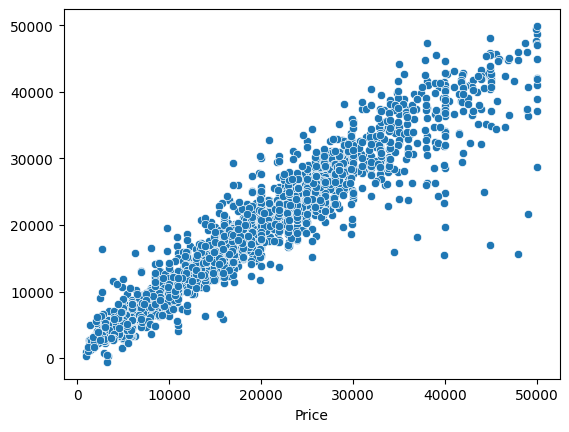

In [ ]:
sns.scatterplot(x = y_test, y = y_pred_lgb);

In [135]:
results = pd.DataFrame({'y_test': y_test, 'pred_LGBM': y_pred_lgb, 'pred_xgb': y_pred_xgb})
results.head(60)

,y_test,pred_LGBM,pred_xgb
10862,44950.0,42572.823781,43844.351562
195,8500.0,11580.752883,11775.485352
4172,14500.0,20384.240090,22977.199219
10615,48687.0,47332.725384,47438.804688
8971,33900.0,34073.030723,33940.121094
10662,35000.0,44183.072426,42932.382812
8440,19980.0,20331.815573,19788.843750
1672,17250.0,17745.625467,17095.277344
5753,20750.0,22466.261012,19394.957031
9131,27490.0,32684.231805,29220.910156


In [137]:
df[df['Price']==300]

,Brand_c,Price,Kilometers,Year,Seats,Doors,Brand_Model_code,Country_c,Gearbox_c,Fuel_c,Seller_c,Type_c,Drivetrain_c,Upholstery_c,Color_c,Body_Type_c,target_bins
7785,4,300.0,296000.0,1999,5.0,2.0,4.256,0,1,0,0,0,0.0,0,3,1,0
7932,4,300.0,296000.0,1999,5.0,2.0,4.256,0,1,0,0,0,0.0,0,3,1,0


In [139]:
mae = 2213
precio_min = df['Price'].min()
precio_max = df['Price'].max()
precio_promedio_estimado = np.mean([300, 10000, 25000, 40000, 50000])

# Calcular error relativo
error_relativo_porcentaje = (mae / precio_promedio_estimado) * 100

print("🎯 RE-ANÁLISIS CON RANGO €500-€50,000")
print("="*60)
print(f"• Rango de precios: €{precio_min:,} - €{precio_max:,}")
print(f"• Precio promedio estimado: €{precio_promedio_estimado:,.0f}")
print(f"• Error absoluto (MAE): €{mae:,}")
print(f"• Error relativo: {error_relativo_porcentaje:.1f}% del precio promedio")

🎯 RE-ANÁLISIS CON RANGO €500-€50,000
• Rango de precios: €300.0 - €49,999.0
• Precio promedio estimado: €25,060
• Error absoluto (MAE): €2,213
• Error relativo: 8.8% del precio promedio


# 1. Usar MAPE en vez de MAE
# 2. Hacer feature engineering específico
# 3. Usar ensemble de múltiples GB
